The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.17.1


# Linear Regression
:label:`sec_linear_regression`

*Regression* refers to a set of methods for modeling
the relationship between one or more independent variables
and a dependent variable.
In the natural sciences and social sciences,
the purpose of regression is most often to
*characterize* the relationship between the inputs and outputs.
Machine learning, on the other hand,
is most often concerned with *prediction*.

Regression problems pop up whenever we want to predict a numerical value.
Common examples include predicting prices (of homes, stocks, etc.),
predicting length of stay (for patients in the hospital),
demand forecasting (for retail sales), among countless others.
Not every prediction problem is a classic regression problem.
In subsequent sections, we will introduce classification problems,
where the goal is to predict membership among a set of categories.


## Elementos Básicos de Regressão Linear


*Regressão linear* pode ser a mais simples
e mais popular entre as ferramentas padrão para regressão.
Datado do início do século 19,
A regressão linear flui a partir de algumas suposições simples.
Primeiro, assumimos que a relação entre
as variáveis ​​independentes $\mathbf{x}$ e a variável dependente $y$ é linear,
ou seja, esse $y$ pode ser expresso como uma soma ponderada
dos elementos em $\mathbf{x}$,
dado algum ruído nas observações.
Em segundo lugar, assumimos que qualquer ruído é bem comportado
(seguindo uma distribuição gaussiana).

Para motivar a abordagem, vamos começar com um exemplo de execução.
Suponha que desejamos estimar os preços das casas (em dólares)
com base em sua área (em pés quadrados) e idade (em anos).
Para realmente desenvolver um modelo para prever os preços das casas,
precisaríamos colocar as mãos em um conjunto de dados
consistindo em vendas para as quais sabemos
o preço de venda, área e idade de cada casa.
Na terminologia de *machine learning*,
o conjunto de dados é chamado de *dataset de treinamento* ou *conjunto de treinamento*,
e cada linha (aqui os dados correspondentes a uma venda)
é chamado de *exemplo* (ou *tupla*, *instância de dados*, * amostra *).
O que estamos tentando prever (preço)
é chamado de * label* (ou *rótulo*).
As variáveis ​​independentes (idade e área)
em que as previsões são baseadas
são chamadas de *features* (ou *covariáveis*).

Normalmente, usaremos $n$ para denotar
o número de exemplos em nosso conjunto de dados.
Nós indexamos os exemplos de dados por $i$, denotando cada entrada
como $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$
e o *label* correspondente como $y^{(i)}$.


### Modelo Linear
:label:`subsec_linear_model`


A suposição de linearidade apenas diz que o alvo (preço)
pode ser expresso como uma soma ponderada das características (área e idade):

$$\mathrm{preço} = w_{\mathrm{área}}\cdot\mathrm{área} + w_{\mathrm{idade}}\cdot\mathrm{idade} + b.$$:eqlabel:`eq_price-area`

In :eqref:`eq_price-area`, $ w_{\mathrm{area}}$ e $w_{\mathrm{age}}$
são chamados de *pesos* e $b$ é chamado de *bias*
(também chamado de *deslocamento* ou *offset*).
Os pesos determinam a influência de cada *feature*
em nossa previsão e o *bias* apenas diz
qual valor o preço previsto deve assumir
quando todos os *features* assumem o valor 0.
Mesmo que nunca vejamos nenhuma casa com área zero,
ou que têm exatamente zero anos de idade,
ainda precisamos do *bias* ou então vamos
limitar a expressividade do nosso modelo.
Estritamente falando, :eqref:`eq_price-area` é uma *transformação afim*
de *features* de entrada,
que é caracterizada por
uma *transformação linear* de *features* via soma ponderada, combinada com
uma *tradução* por meio do *bias* adicionado.

Dado um *dataset*, nosso objetivo é escolher
os pesos $\mathbf{w}$ e o *bias* $b$ de modo que, em média,
as previsões feitas de acordo com nosso modelo
 se ajustem o melhor possível aos preços reais observados nos dados.
Modelos cuja previsão de saída
é determinada pela transformação afim de *features* de entrada
são *modelos lineares*,
onde a transformação afim é especificada pelos pesos e *bias* escolhidos.


Em disciplinas onde é comum se concentrar
em conjuntos de dados com apenas alguns *features*,
expressar explicitamente modelos de formato longo como esse é comum.
No  *machine learning*, geralmente trabalhamos com *datasets* de alta dimensão,
portanto, é mais conveniente empregar a notação de álgebra linear.
Quando nossas entradas consistem em $d$ *features*,
expressamos nossa previsão $\hat{y}$ (em geral, o símbolo "chapéu" ou  "acento circunflexo" denota estimativas) como

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

Coletando todas as *features* em um vetor $\mathbf{x}\in\mathbb{R}^d$
e todos os pesos em um vetor $\mathbf{w}\in\mathbb{R}^d$,
podemos expressar nosso modelo compactamente usando um produto escalar:

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$
:eqlabel:`eq_linreg-y`


Em :eqref:`eq_linreg-y`, o vetor $\mathbf{x}$ corresponde às *features* de um único exemplo de dados.
Frequentemente acharemos conveniente
para se referir a recursos de todo o nosso *dataset* de $n$ exemplos
através da *matriz de design* $\mathbf{X}\in\mathbb{R}^{n\times d}$.
Aqui, $\mathbf{X}$ contém uma linha para cada exemplo
e uma coluna para cada *feature*.

Para uma coleção de *features* $\mathbf{X}$,
as previsões $\hat{\mathbf{y}}\in\mathbb{R}^n$
pode ser expresso por meio do produto matriz-vetor:
$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b,$$

onde a transmissão (veja :numref:`subsec_broadcasting`) é aplicada durante o somatório.
Dadas as *features* de um *dataset* de treinamento $\mathbf{X}$
e *labels* correspondentes (conhecidos) $\mathbf{y}$,
o objetivo da regressão linear é encontrar
o vetor de pesos $\mathbf{w}$ e o termo de polarização $b$
que dadas as *features* de um novo exemplo de dados
amostrado da mesma distribuição de $\mathbf{X}$,
o *label* do novo exemplo será (na expectativa) previsto com o menor erro.


Mesmo se acreditarmos que o melhor modelo para
predizer $y$ dado $\mathbf{x}$ é linear,
não esperaríamos encontrar um *dataset* do mundo real de $n$ exemplos onde
$y^{(i)}$ é exatamente igual a $\mathbf{w}^\top\mathbf{x}^{(i)} + b$
para todos $1\leq i \leq n$.
Por exemplo, quaisquer instrumentos que usarmos para observar
as *features* $\mathbf{X}$ e os *labels* $\mathbf{y}$
podem sofrer uma pequena quantidade de erro de medição.
Assim, mesmo quando estamos confiantes
que a relação subjacente é linear,
vamos incorporar um termo de ruído para contabilizar esses erros.

Antes de começarmos a pesquisar os melhores *parâmetros* (ou *parâmetros do modelo*) $\mathbf{w}$ e $b$,
precisaremos de mais duas coisas:
(i) uma medida de qualidade para algum modelo dado;
e (ii) um procedimento de atualização do modelo para melhorar sua qualidade.


### Função de Perda

Antes de começarmos a pensar sobre como *ajustar* os dados ao nosso modelo,
precisamos determinar uma medida de *aptidão*.
A *função de perda* quantifica a distância
entre o valor *real* e *previsto* do *target*.
A perda geralmente será um número não negativo
onde valores menores são melhores
e previsões perfeitas incorrem em uma perda de 0.
A função de perda mais popular em problemas de regressão
é o erro quadrático.
Quando nossa previsão para um exemplo $i$ é $\hat{y}^{(i)}$
e o *label verdadeiro correspondente é $y^{(i)}$,
o quadrado do erro é dado por:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

A constante $\frac{1}{2}$ não faz diferença real
mas será notacionalmente conveniente,
cancelando quando tomamos a derivada da perda.
Como o conjunto de dados de treinamento é fornecido a nós e, portanto, está fora de nosso controle,
o erro empírico é apenas função dos parâmetros do modelo.
Para tornar as coisas mais concretas, considere o exemplo abaixo
onde traçamos um problema de regressão para um caso unidimensional
como mostrado em :numref:`fig_fit_linreg`.

![Fit data with a linear model.](../img/fit-linreg.svg)
:label:`fig_fit_linreg`

Observe que grandes diferenças entre
estimativas $\hat{y}^{(i)}$ e observações $y^{(i)}$
levam a contribuições ainda maiores para a perda,
devido à dependência quadrática.
Para medir a qualidade de um modelo em todo o conjunto de dados de $n$ exemplos,
nós simplesmente calculamos a média (ou equivalentemente, somamos)
as perdas no conjunto de treinamento.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Ao treinar o modelo, queremos encontrar os parâmetros ($\mathbf{w}^*, b^*$)
que minimizam a perda total em todos os exemplos de treinamento:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$


### Solução Analítica

A regressão linear passa a ser um problema de otimização incomumente simples.
Ao contrário da maioria dos outros modelos que encontraremos neste livro,
a regressão linear pode ser resolvida analiticamente aplicando uma fórmula simples.
Para começar, podemos incluir o *bias* $b$ no parâmetro $\mathbf{w}$
anexando uma coluna à matriz de design que consiste em todas as unidades.
Então nosso problema de previsão é minimizar $\|\mathbf{y} -\mathbf{X}\mathbf{w}\|^2$.
Há apenas um ponto crítico na superfície de perda
e corresponde ao mínimo de perda em todo o domínio.
Tirando a derivada da perda em relação a $\mathbf{w}$
e defini-lo igual a zero produz a solução analítica (de forma fechada):

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

Embora problemas simples como regressão linear
podem admitir soluções analíticas,
você não deve se acostumar com essa boa sorte.
Embora as soluções analíticas permitam uma boa análise matemática,
o requisito de uma solução analítica é tão restritivo
que isso excluiria todo o *deep learning*.

### Gradiente Descendente Estocástico com *Minibatch* 


Mesmo nos casos em que não podemos resolver os modelos analiticamente,
acontece que ainda podemos treinar modelos efetivamente na prática.
Além disso, para muitas tarefas, aqueles modelos difíceis de otimizar
acabam sendo muito melhores do que descobrir como treiná-los
acaba valendo a pena.

A principal técnica para otimizar quase qualquer modelo de *deep learning*,
e que recorreremos ao longo deste livro,
consiste em reduzir iterativamente o erro
atualizando os parâmetros na direção
que diminui gradativamente a função de perda.
Este algoritmo é denominado *gradiente descendente*.

A aplicação mais ingênua de gradiente descendente
consiste em obter a derivada da função de perda,
que é uma média das perdas calculadas
em cada exemplo no *dataset*.
Na prática, isso pode ser extremamente lento:
devemos passar por todo o conjunto de dados antes de fazer uma única atualização.
Assim, frequentemente nos contentaremos em amostrar um *minibatch* aleatório de exemplos
toda vez que precisamos calcular a atualização,
uma variante chamada *gradiente descendente estocástico de minibatch*.

Em cada iteração, primeiro amostramos aleatoriamente um *minibatch* $\mathcal{B}$
consistindo em um número fixo de exemplos de treinamento.
Em seguida, calculamos a derivada (gradiente) da perda média
no *minibatch* em relação aos parâmetros do modelo.
Finalmente, multiplicamos o gradiente por um valor positivo predeterminado $\eta$
e subtraimos o termo resultante dos valores dos parâmetros atuais.

Podemos expressar a atualização matematicamente da seguinte forma
($\partial$ denota a derivada parcial):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$


Para resumir, as etapas do algoritmo são as seguintes:
(i) inicializamos os valores dos parâmetros do modelo, normalmente de forma aleatória;
(ii) amostramos iterativamente *minibatches* aleatórios dos dados,
atualizando os parâmetros na direção do gradiente negativo.
Para perdas quadráticas e transformações afins,
podemos escrever isso explicitamente da seguinte maneira:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$
:eqlabel:`eq_linreg_batch_update`



Observe que $\mathbf{w}$ e $\mathbf{x}$ são vetores em :eqref:`eq_linreg_batch_update`.
Aqui, a notação vetorial mais elegante torna a matemática
muito mais legível do que expressar coisas em termos de coeficientes,
diga $w_1, w_2, \ldots, w_d$.
A cardinalidade definida
$|\mathcal{B}|$ representa
o número de exemplos em cada *minibatch* (o *tamanho do lote*)
e $\eta$ denota a *taxa de aprendizagem*.
Enfatizamos que os valores do tamanho do lote e da taxa de aprendizagem
são pré-especificados manualmente e normalmente não aprendidos por meio do treinamento do modelo.
Esses parâmetros são ajustáveis, mas não atualizados
no loop de treinamento são chamados de *hiperparâmetros*.
*Ajuste de hiperparâmetros* é o processo pelo qual os hiperparâmetros são escolhidos,
e normalmente requer que os ajustemos
com base nos resultados do ciclo de treinamento
conforme avaliado em um *dataset de validação* separado (ou *conjunto de validação*).

Após o treinamento para algum número predeterminado de iterações
(ou até que algum outro critério de parada seja atendido),
registramos os parâmetros estimados do modelo,
denotado $\hat{\mathbf{w}}, \hat{b}$.
Observe que mesmo que nossa função seja verdadeiramente linear e sem ruídos,
esses parâmetros não serão os minimizadores exatos da perda
porque, embora o algoritmo convirja lentamente para os minimizadores,
não pode alcançá-los exatamente em um número finito de etapas.

A regressão linear passa a ser um problema de aprendizagem onde há apenas um mínimo
em todo o domínio.
No entanto, para modelos mais complicados, como redes profundas,
as superfícies de perda contêm muitos mínimos.
Felizmente, por razões que ainda não são totalmente compreendidas,
praticantes de *deep learning* raramente se esforçam para encontrar parâmetros
que minimizem a perda *em conjuntos de treinamento*.
A tarefa mais formidável é encontrar parâmetros
que irão atingir baixa perda de dados
que não vimos antes,
um desafio chamado *generalização*.
Retornamos a esses tópicos ao longo do livro.


### Fazendo Predições com o Modelo Aprendido



Dado o modelo de regressão linear aprendido
$\hat{\mathbf{w}}^\top\mathbf{x} + \hat{b}$,
agora podemos estimar o preço de uma nova casa
(não contido nos dados de treinamento)
dada sua área $x_1$ e idade $x_2$.
Estimar *labels* dadas as características é
comumente chamado de *predição* ou *inferência*.

Tentaremos manter o termo *predição* porque
chamando esta etapa de *inferência*,
apesar de emergir como jargão padrão no *deep learning*,
é um nome impróprio.
Em estatísticas, *inferência* denota mais frequentemente
estimar parâmetros com base em um conjunto de dados.
Este uso indevido de terminologia é uma fonte comum de confusão
quando os profissionais de *machine learning* conversam com os estatísticos.

## Vetorização para Velocidade

Ao treinar nossos modelos, normalmente queremos processar
*minibatches* inteiros de exemplos simultaneamente.
Fazer isso de forma eficiente requer que (**nós**) (~~devemos~~) (**vetorizar os cálculos
e aproveitar as bibliotecas de álgebra linear rápida
em vez de escrever *loops for* custosos em Python.**)


In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

Para ilustrar por que isso é tão importante,
podemos (**considerer dois métodos para adicionar vetores.**)
Para começar, instanciamos dois vetores de 10000 dimensões
contendo todos os outros.
Em um método, faremos um loop sobre os vetores com um *loop for* Python.
No outro método, contaremos com uma única chamada para `+`.


In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

Uma vez que iremos comparar o tempo de execução com freqüência neste livro,
[**vamos definir um cronômetro**].


In [3]:
class Timer:  #@save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

Agora podemos avaliar as cargas de trabalho.
Primeiro, [**nós os adicionamos, uma coordenada por vez,
usando um *loop for*.**]


In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.09436 sec'

(**Alternativamente, contamos com o operador recarregado `+` para calcular a soma elemento a elemento.**)


In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00022 sec'

Você provavelmente percebeu que o segundo método
é dramaticamente mais rápido que o primeiro.
A vetorização do código geralmente produz acelerações da ordem de magnitude.
Além disso, colocamos mais matemática na biblioteca
e não precisamos escrever tantos cálculos nós mesmos,
reduzindo o potencial de erros.

## A Distribuição Normal e Perda Quadrada
:label:`subsec_normal_distribution_and_squared_loss`


Embora você já possa sujar as mãos usando apenas as informações acima,
a seguir, podemos motivar mais formalmente o objetivo de perda quadrado
através de suposições sobre a distribuição do ruído.

A regressão linear foi inventada por Gauss em 1795,
que também descobriu a distribuição normal (também chamada de *Gaussiana*).
Acontece que a conexão entre
a distribuição normal e regressão linear
é mais profunda do que o parentesco comum.
Para refrescar sua memória, a densidade de probabilidade
de uma distribuição normal com média $\mu$ e variância $\sigma^2$ (desvio padrão $\sigma$)
é dada como
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

Abaixo [**definimos uma função Python para calcular a distribuição normal**].


In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

Podemos agora (**visualizar as distribuições normais**).


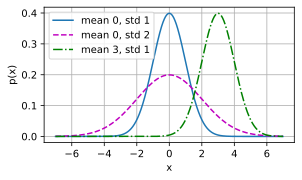

In [7]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

Como podemos ver, mudar a média corresponde a uma mudança ao longo do eixo $x$,
e aumentar a variância espalha a distribuição, diminuindo seu pico.

Uma maneira de motivar a regressão linear com a função de perda de erro quadrático médio (ou simplesmente perda quadrada)
é assumir formalmente que as observações surgem de observações ruidosas,
onde o ruído é normalmente distribuído da seguinte forma:

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ onde } \epsilon \sim \mathcal{N}(0, \sigma^2).$$

Assim, podemos agora escrever a *probabilidade*
de ver um determinado $y$ para um determinado $\mathbf{x}$ via

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

Agora, de acordo com o princípio da máxima verossimilhança (*likelihood*),
os melhores valores dos parâmetros $\mathbf{w}$ e $b$ são os
que maximizam a *probabilidade* de todo o conjunto de dados:

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

Estimadores escolhidos de acordo com o princípio da máxima verossimilhança
são chamados de *estimadores de máxima verossimilhança*.
Enquanto, maximizando o produto de muitas funções exponenciais,
pode parecer difícil,
podemos simplificar as coisas significativamente, sem alterar o objetivo,
maximizando o log da probabilidade em vez disso.
Por razões históricas, as otimizações são expressas com mais frequência
como minimização em vez de maximização.
Portanto, sem alterar nada, podemos minimizar a *probabilidade de log negativo*
$-\log P(\mathbf y \mid \mathbf X)$.
Trabalhando a matemática nos dá:

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

Agora, precisamos apenas mais uma suposição de que $\sigma$ é alguma constante fixa.
Assim, podemos ignorar o primeiro termo porque
não depende de $\mathbf{w}$ ou $b$.
Agora, o segundo termo é idêntico à perda de erro quadrada introduzida anteriormente,
exceto para a constante multiplicativa $\frac{1}{\sigma^2}$.
Felizmente, a solução não depende de $\sigma$.
Segue-se que minimizar o erro quadrático médio
é equivalente a estimar a máxima verossimilhança
de um modelo linear sob a suposição de ruído gaussiano aditivo.

## Da Regressão Linear às Redes Profundas

Até agora, falamos apenas sobre modelos lineares.
Enquanto as redes neurais cobrem uma família muito mais rica de modelos,
podemos começar a pensar no modelo linear
como uma rede neural, expressando-a na linguagem das redes neurais.
Para começar, vamos começar reescrevendo as coisas em uma notação de "camada".

### Diagrama de Rede Neural

Praticantes de *deep learning* gostam de desenhar diagramas
para visualizar o que está acontecendo em seus modelos.
Em :numref:`fig_single_neuron`,
retratamos nosso modelo de regressão linear como uma rede neural.
Observe que esses diagramas destacam o padrão de conectividade
como cada entrada é conectada à saída,
mas não os valores tomados pelos pesos ou *bias*.

![Linear regression is a single-layer neural network.](http://d2l.ai/_images/singleneuron.svg)
:label:`fig_single_neuron`


Para a rede neural mostrada em :numref:`fig_single_neuron`,
as entradas são $x_1,\ldots, x_d$,
portanto, o *número de entradas* (ou *dimensionalidade do recurso*) na camada de entrada é $d$.
A saída da rede em :numref:`fig_single_neuron` é $o_1$,
portanto, o *número de saídas* na camada de saída é 1.
Observe que os valores de entrada são todos *fornecidos*
e há apenas um único neurônio *calculado*.
Concentrando-se em onde a computação ocorre,
convencionalmente, não consideramos a camada de entrada ao contar camadas.
Quer dizer,
o *número de camadas* para a rede neural em :numref:`fig_single_neuron` é 1.
Podemos pensar em modelos de regressão linear como redes neurais
consistindo em apenas um único neurônio artificial,
ou como redes neurais de camada única.

Já que para a regressão linear, cada entrada é conectada
para cada saída (neste caso, há apenas uma saída),
podemos considerar esta transformação (a camada de saída em :numref:`fig_single_neuron`)
como uma *camada totalmente conectada* ou *camada densa*.
Falaremos muito mais sobre redes compostas por tais camadas
no próximo capítulo.


### Biologia

Como a regressão linear (inventada em 1795)
antecede a neurociência computacional,
pode parecer anacrônico descrever
regressão linear como uma rede neural.
Para ver por que os modelos lineares eram um lugar natural para começar
quando os ciberneticistas/neurofisiologistas
Warren McCulloch e Walter Pitts começaram a desenvolver
modelos de neurônios artificiais,
considere a imagem de desenho animado
de um neurônio biológico em :numref:`fig_Neuron`, consistindo em
*dendritos* (terminais de entrada),
o *núcleo* (CPU), o *axônio* (fio de saída),
e os * terminais de axônio* (terminais de saída),
permitindo conexões com outros neurônios por meio de *sinapses*.

![The real neuron.](http://d2l.ai/_images/neuron.svg)
:label:`fig_Neuron`


Informação $x_i$ vinda de outros neurônios
(ou sensores ambientais, como a retina)
é recebida nos dendritos.
Em particular, essa informação é ponderada por *pesos sinápticos* $w_i$
determinando o efeito das entradas
(por exemplo, ativação ou inibição por meio do produto $x_i w_i$).
As entradas ponderadas que chegam de várias fontes
são agregadas no núcleo como uma soma ponderada $y = \sum_i x_i w_i + b$,
e esta informação é então enviada para processamento adicional no axônio $y$,
normalmente após algum processamento não linear via $\sigma(y)$.
De lá, ela chega ao seu destino (por exemplo, um músculo)
ou é alimentado em outro neurônio por meio de seus dendritos.

Certamente, a ideia de alto nível de que muitas dessas unidades
poderiam ser remendadas com a conectividade certa
e algoritmo de aprendizado correto,
para produzir um comportamento muito mais interessante e complexo
do que qualquer neurônio sozinho poderia expressar,
se deve ao nosso estudo de sistemas neurais biológicos reais.

Ao mesmo tempo, a maioria das pesquisas em *deep learning* hoje
atrai pouca inspiração direta na neurociência.
Invocamos Stuart Russell e Peter Norvig que,
em seu livro clássico de IA
*Inteligência Artificial: Uma Abordagem Moderna* :cite:`Russell.Norvig.2016`,
apontoam que, embora os aviões possam ter sido *inspirados* por pássaros,
ornitologia não tem sido o principal motivador
de inovação aeronáutica por alguns séculos.
Da mesma forma, a inspiração no *deep learning* nos dias de hoje
vem em igual ou maior medida da matemática,
estatísticas e ciência da computação.

## Summary

* Os principais ingredientes em um modelo de *machine learning* são dados de treinamento, uma função de perda, um algoritmo de otimização e, obviamente, o próprio modelo.
* A vetorização torna tudo melhor (principalmente matemática) e mais rápido (principalmente código).
* Minimizar uma função objetivo e realizar a estimativa de máxima verossimilhança pode significar a mesma coisa.
* Os modelos de regressão linear também são redes neurais.


## Exercises

1. Suponha que temos alguns dados $x_1, \ldots, x_n \in \mathbb{R}$. Nosso objetivo é encontrar uma constante $b$ tal que $ \sum_i(x_i - b)^2$ seja minimizado.
    1. Encontre uma solução analítica para o valor ideal de $b$.
    1. Como esse problema e sua solução se relacionam com a distribuição normal?
1. Derive a solução analítica para o problema de otimização para regressão linear com erro quadrático. Para manter as coisas simples, você pode omitir o *bias* $b$ do problema (podemos fazer isso com base em princípios, adicionando uma coluna a $\mathbf X$ consistindo em todas as colunas).
    1. Escreva o problema de otimização em notação de matriz e vetor (trate todos os dados como uma única matriz e todos os valores de *label* esperados como um único vetor).
    1. Calcule o gradiente da perda em relação a $w$.
    1. Encontre a solução analítica definindo o gradiente igual a zero e resolvendo a equação da matriz.
    1. Quando isso pode ser melhor do que usar o gradiente descendente estocástico? Quando esse método pode falhar?
1. Suponha que o modelo de ruído que governa o ruído aditivo $\epsilon$ é a distribuição exponencial. Ou seja, $p(\epsilon) = \frac{1}{2}\exp(-|\epsilon|)$.
    1. Escreva a *log-likelihood* negativa dos dados no modelo $-\log P(\mathbf y\mid\mathbf X)$.
    1. Você pode encontrar uma solução de forma fechada?
    1. Sugira um algoritmo de gradiente descendente estocástico para resolver este problema. O que pode dar errado (dica: o que acontece perto do ponto estacionário à medida que atualizamos os parâmetros)? Você pode consertar isso?


[Discussions](https://discuss.d2l.ai/t/258)


<!--stackedit_data:
eyJoaXN0b3J5IjpbLTE0OTYzODU2OSwtMTgyOTE1NzAyNCw1Mz
Q3MjY1MzgsNjM3NzIzMTc3LC0xMTUyMDAxNjUxLDIzMTI0NDQy
NCwxMzE4MTc5ODcsLTE1MTAxMDMwNzIsMjI3MjM3NjM4LC0xND
Q3NTc3NTIwLDE5MTQ2NjU3MDIsMzgwNjQzODA1LC0xNjc1ODAw
NTcsLTE3OTg3OTA0MjRdfQ==
-->
